In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

# Loading and cleaning data

In [2]:
df = pd.read_csv("tech_team_test.csv")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,2291,266,3126,2,2011-01-28 13:27:00,13707.0,35
1,9178,1336,1617,1,2011-07-10 16:18:00,16877.0,35
2,11653,43,3842,25,2011-09-05 14:11:00,13510.0,35
3,14845,1643,1272,8,2011-10-27 15:49:00,14525.0,35
4,11576,1581,146,2,2011-09-04 12:49:00,17774.0,35


## Info about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84780 entries, 0 to 84779
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    84780 non-null  int64  
 1   StockCode    84780 non-null  int64  
 2   Description  84780 non-null  int64  
 3   Quantity     84780 non-null  int64  
 4   InvoiceDate  84780 non-null  object 
 5   CustomerID   84780 non-null  float64
 6   Country      84780 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 4.5+ MB


### So we can see that there are 84780 entries having 7 columns with no null values !

## Getting numeric columns 

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)

## Looking if there are some negative values in dataset in numeric columns

In [6]:
print("column name  negative values \n")
for col in numeric_df.columns :
    print(f'{col} : ', len(df[df[col] < 0]))

column name  negative values 

InvoiceNo :  0
StockCode :  0
Description :  0
Quantity :  1850
CustomerID :  0
Country :  0


### So as we can see that "Quantity" columns consists of negative values which should not be there so let's drop those rows 
(Since there are 84780 rows thus dropping 1850 rows won't cause much difference)

In [7]:
df = df[df["Quantity"] > 0]

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,2291,266,3126,2,2011-01-28 13:27:00,13707.0,35
1,9178,1336,1617,1,2011-07-10 16:18:00,16877.0,35
2,11653,43,3842,25,2011-09-05 14:11:00,13510.0,35
3,14845,1643,1272,8,2011-10-27 15:49:00,14525.0,35
4,11576,1581,146,2,2011-09-04 12:49:00,17774.0,35


In [9]:
len(df[df["Quantity"] < 0]) # Thus we have removed the rows which contains negative values 

0

## Unique values in each column

In [10]:
df.nunique() 

InvoiceNo      15552
StockCode       3267
Description     3392
Quantity         170
InvoiceDate    14646
CustomerID      4093
Country           37
dtype: int64

### So looking at this we can say that for each InvoiceNo there are some common StockCodes

### Looking at the years from which data is gathered

In [11]:
years = []
for datetime in df["InvoiceDate"].unique() :
    years.append(datetime[:4])

In [12]:
np.unique(years)

array(['2010', '2011'], dtype='<U4')

### Data is gathered from year 2010 and 2011

## By looking at the data it seems like "Description" column is of no use for analysis as it just contains a number which could be a length of the description provided for some stock, so we will just drop that column

In [13]:
df.drop(columns = ["Description"], axis = 1, inplace = True)

In [14]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Country
0,2291,266,2,2011-01-28 13:27:00,13707.0,35
1,9178,1336,1,2011-07-10 16:18:00,16877.0,35
2,11653,43,25,2011-09-05 14:11:00,13510.0,35
3,14845,1643,8,2011-10-27 15:49:00,14525.0,35
4,11576,1581,2,2011-09-04 12:49:00,17774.0,35


---
# Questions which can come after looking at the data 
1. Which Stocks get sold most ?
2. In which countries most of the stocks are sold ? Or from which countries Stocks were bought a lot ?
3. Trend of sell of stocks over a  year
---

## Let's look at this questions one by one

## Q1. Which Stocks get sold most ?

In [15]:
stock_df = df.groupby(["StockCode"]) # grouping w.r.t StockCode
stock_df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Country
0,2291,266,2,2011-01-28 13:27:00,13707.0,35
1,9178,1336,1,2011-07-10 16:18:00,16877.0,35
2,11653,43,25,2011-09-05 14:11:00,13510.0,35
3,14845,1643,8,2011-10-27 15:49:00,14525.0,35
4,11576,1581,2,2011-09-04 12:49:00,17774.0,35
...,...,...,...,...,...,...
84604,12833,3404,24,2011-09-26 15:35:00,12612.0,14
84687,15252,3636,2,2011-11-02 15:56:00,17999.0,35
84708,6146,2689,1,2011-05-06 19:42:00,12748.0,35
84730,5036,2572,48,2011-04-08 12:42:00,13562.0,35


### If we check for some StockCode we can see that we get Quantities of the Stock Sold 

In [16]:
stock_df.get_group(0)

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Country
10367,5459,0,1,2011-04-18 12:56:00,14525.0,35
10872,736,0,8,2010-12-09 14:08:00,16795.0,35
35857,403,0,24,2010-12-06 08:42:00,17677.0,35
43953,5367,0,62,2011-04-15 12:14:00,18079.0,35
46347,2050,0,2,2011-01-23 13:34:00,13230.0,35
55831,269,0,1,2010-12-03 11:19:00,17967.0,35
57072,4790,0,2,2011-04-03 15:07:00,17337.0,35
59711,3112,0,12,2011-02-22 11:02:00,17994.0,35
67849,1974,0,6,2011-01-20 10:43:00,16395.0,35
72597,5,0,48,2010-12-01 08:45:00,12583.0,13


## getting total quantities for each stock 

In [17]:
stock_df.sum().reset_index()

,StockCode,InvoiceNo,Quantity,CustomerID,Country
0,0,24165,166,162582.0,328
1,1,98814,90,110423.0,245
2,2,101423,54,167379.0,350
3,3,8238,4,28734.0,70
4,4,458,4,16710.0,35
...,...,...,...,...,...
3262,3676,18330,1,16271.0,35
3263,3677,297749,30,437419.0,503
3264,3680,57031,4,56384.0,140
3265,3681,540328,1352,929509.0,1999


In [18]:
Stock_Quantity_df = stock_df.sum().reset_index()[["StockCode","Quantity"]]

In [19]:
Stock_Quantity_df

,StockCode,Quantity
0,0,166
1,1,90
2,2,54
3,3,4
4,4,4
...,...,...
3262,3676,1
3263,3677,30
3264,3680,4
3265,3681,1352


In [20]:
Top5_Stocks_df = Stock_Quantity_df.sort_values(by = "Quantity" , ascending = False) # Sorting to get top 5 
Top5_Stocks_df

,StockCode,Quantity
2314,2403,80995
2643,2812,12231
3009,3249,8726
1022,1092,8713
2998,3235,8499
...,...,...
184,209,1
3176,3508,1
2386,2503,1
270,312,1


## Thus we get top 5 stocks which get sold a lot with their Quantities  

In [21]:
from IPython.display import display, HTML
display(HTML(Top5_Stocks_df.iloc[:5][["StockCode","Quantity"]].to_html(index=False))) # just to print without index

StockCode,Quantity
2403,80995
2812,12231
3249,8726
1092,8713
3235,8499


## Q2. In which countries most of the stocks are sold ?

In [22]:
country_df = df.groupby(["Country"]) # grouping w.r.t StockCode
country_df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Country
0,2291,266,2,2011-01-28 13:27:00,13707.0,35
1,9178,1336,1,2011-07-10 16:18:00,16877.0,35
2,11653,43,25,2011-09-05 14:11:00,13510.0,35
3,14845,1643,8,2011-10-27 15:49:00,14525.0,35
4,11576,1581,2,2011-09-04 12:49:00,17774.0,35
...,...,...,...,...,...,...
51457,6253,1547,24,2011-05-09 13:49:00,12355.0,2
63243,13576,1437,72,2011-10-07 10:37:00,12781.0,8
79226,3334,2995,48,2011-02-28 08:43:00,12781.0,8
80156,6892,2508,2,2011-05-19 17:47:00,12353.0,2


In [23]:
Country_Quantity_df = country_df.sum().reset_index()[["Country","Quantity"]]

In [24]:
Country_Quantity_df

,Country,Quantity
0,0,15508
1,1,832
2,2,86
3,3,4645
4,4,80
5,5,476
6,6,2105
7,7,1164
8,8,168
9,9,1057


### Plotting this distribution w.r.t. Quantities 

In [25]:
Country_Quantity_df.Quantity.max()

927701

In [26]:
Country_Quantity_df.Quantity.min()

42

#### Considering only those values which are greater than mean since a the quantities are varying from  42 to 927701 Since some values are too small as compared to other large values 

In [27]:
CQ_mean = Country_Quantity_df.Quantity.mean()
CQ_mean

30269.486486486487

In [28]:
Country_Quantity_df[Country_Quantity_df["Quantity"] > int(CQ_mean)]

,Country,Quantity
10,10,31687
23,23,44059
35,35,927701


### OOps ! 
Even the mean is too large that only 3 countries sit within that range so let's consider some random value say 3000 to get more countries in view for better visualization

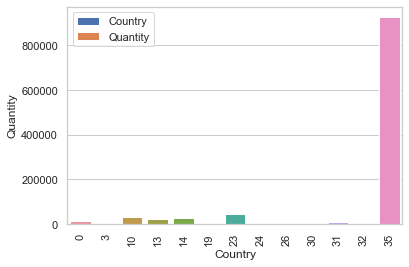

In [29]:
Country_Quantity_df[Country_Quantity_df["Quantity"] > 3000].plot(kind='bar')
sns.barplot(x="Country", y="Quantity", data=Country_Quantity_df[Country_Quantity_df["Quantity"] > 3000] )

# By looking at distribution it very clear that Country with code 35 boughts a lot of Stocks or items so that country could be the country where this stocks are manufactured 

In [30]:
Country_Quantity_df[Country_Quantity_df["Country"] == 35]

,Country,Quantity
35,35,927701


## Q.3 Trend of sell of stocks over a  year

In [31]:
df['year'] = pd.DatetimeIndex(df['InvoiceDate']).year

In [32]:
df['year']

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
84775    2011
84776    2011
84777    2011
84778    2011
84779    2011
Name: year, Length: 82930, dtype: int64

In [34]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Country,year
0,2291,266,2,2011-01-28 13:27:00,13707.0,35,2011
1,9178,1336,1,2011-07-10 16:18:00,16877.0,35,2011
2,11653,43,25,2011-09-05 14:11:00,13510.0,35,2011
3,14845,1643,8,2011-10-27 15:49:00,14525.0,35,2011
4,11576,1581,2,2011-09-04 12:49:00,17774.0,35,2011


In [33]:
df['year'].value_counts()

2011    77412
2010     5518
Name: year, dtype: int64

## Let's see how many stocks were sold in 2010 vs 2011

In [35]:
year_df = df.groupby(["year"])

In [36]:
year_df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Country,year
0,2291,266,2,2011-01-28 13:27:00,13707.0,35,2011
1,9178,1336,1,2011-07-10 16:18:00,16877.0,35,2011
2,11653,43,25,2011-09-05 14:11:00,13510.0,35,2011
3,14845,1643,8,2011-10-27 15:49:00,14525.0,35,2011
4,11576,1581,2,2011-09-04 12:49:00,17774.0,35,2011
50,258,800,36,2010-12-03 09:31:00,17135.0,35,2010
83,642,358,2,2010-12-08 14:22:00,13523.0,35,2010
104,1362,1330,12,2010-12-21 14:54:00,13487.0,35,2010
153,771,1258,2,2010-12-09 18:58:00,14713.0,35,2010
162,888,391,4,2010-12-12 16:05:00,17618.0,35,2010


In [37]:
Year_Quantity_df = year_df.sum().reset_index()[["year","Quantity"]]

In [38]:
Year_Quantity_df.head()

,year,Quantity
0,2010,65212
1,2011,1054759


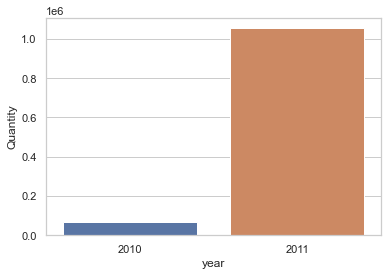

In [39]:
ax = sns.barplot(x="year", y="Quantity", data=Year_Quantity_df)

## Let's see mothwise trend of items sold in 2010 and 2011

In [40]:
df['month'] = pd.DatetimeIndex(df['InvoiceDate']).month

In [41]:
df['month']

0         1
1         7
2         9
3        10
4         9
         ..
84775     3
84776    10
84777     5
84778    10
84779     8
Name: month, Length: 82930, dtype: int64

In [42]:
month_df = df.groupby(["month", "year"])

In [43]:
month_df.head(10)

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Country,year,month
0,2291,266,2,2011-01-28 13:27:00,13707.0,35,2011,1
1,9178,1336,1,2011-07-10 16:18:00,16877.0,35,2011,7
2,11653,43,25,2011-09-05 14:11:00,13510.0,35,2011,9
3,14845,1643,8,2011-10-27 15:49:00,14525.0,35,2011,10
4,11576,1581,2,2011-09-04 12:49:00,17774.0,35,2011,9
...,...,...,...,...,...,...,...,...
308,5085,875,1,2011-04-10 16:01:00,14504.0,35,2011,4
310,18225,1608,24,2011-12-06 12:28:00,17481.0,35,2011,12
332,5059,1381,1,2011-04-10 11:14:00,18118.0,35,2011,4
361,4816,1838,12,2011-04-04 12:37:00,13294.0,35,2011,4


In [44]:
Month_Quantity_df = month_df.sum().reset_index()[["month","year","Quantity"]]

### For 2010

In [45]:
Month2010_Quantity_df = Month_Quantity_df[Month_Quantity_df["year"] == 2010]

In [46]:
Month2010_Quantity_df

,month,year,Quantity
11,12,2010,65212


#### So there was only one month from 2010 when the 65212 products were sold !

### For 2011

In [47]:
Month2011_Quantity_df = Month_Quantity_df[Month_Quantity_df["year"] == 2011]

In [48]:
Month2011_Quantity_df

,month,year,Quantity
0,1,2011,57589
1,2,2011,57268
2,3,2011,68302
3,4,2011,59621
4,5,2011,74364
5,6,2011,74914
6,7,2011,73230
7,8,2011,86574
8,9,2011,112211
9,10,2011,124074


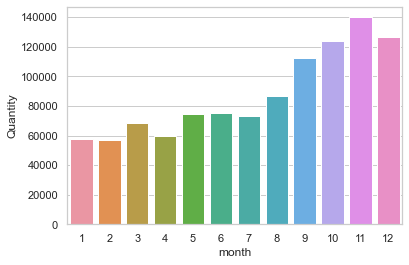

In [49]:
sns.barplot(x="month", y="Quantity", data=Month2011_Quantity_df)

## So we can see that in the end of the year from September to December stocks sold in 2011 were in high demand 

# Thank You !